# House Prices Competition : Term Project 

#### Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### To do List :

* Functions for each data preparation and processing method
* Read about features engineering and selection
* apply pca
* how to select the non_numerical features that are most important 


### Importing Libraries:

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [298]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [299]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [300]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


### Features engineering :

Same transformations should be applied on the training and testing data when doing features engineering.

### Handling non-numerical features :

In [301]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [302]:
#to check how many categories we have per feature
#for feature in categoricals:
    #print ("Unique values of ",feature," : " , train[feature].unique())

First we will deal with nominal features with null values that could be significant, for example :
- Alley
- MasVnrType
- GarageType
- MiscFeature


In [303]:
categoricals_with_null = categoricals[['Alley','MasVnrType','GarageType','MiscFeature']]
categoricals_with_null.head()

,Alley,MasVnrType,GarageType,MiscFeature
0,NaN,BrkFace,Attchd,NaN
1,NaN,None,Attchd,NaN
2,NaN,BrkFace,Attchd,NaN
3,NaN,None,Detchd,NaN
4,NaN,BrkFace,Attchd,NaN


In [304]:
categoricals_with_null['Alley'].unique()

alleyLabel = {'Grvl': 1, 'Pave': 2, None: 0}

categoricals_with_null['AlleyLabel'] = categoricals_with_null['Alley'].map(alleyLabel)
categoricals_with_null[['Alley', 'AlleyLabel']].iloc[20:25]

C:\Users\Rayhane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Alley,AlleyLabel
20,NaN,0
21,Grvl,1
22,NaN,0
23,NaN,0
24,NaN,0


In [305]:
categoricals_with_null['MasVnrType'].unique()

MasVnrTypeLabel = {'BrkFace': 1, 'Stone': 2,'BrkCmn': 3, 'None': 0}

categoricals_with_null['MasVnrTypeLabel'] = categoricals_with_null['MasVnrType'].map(MasVnrTypeLabel)
categoricals_with_null[['MasVnrType', 'MasVnrTypeLabel']].iloc[10:18]

C:\Users\Rayhane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,MasVnrType,MasVnrTypeLabel
10,None,0.0
11,Stone,2.0
12,None,0.0
13,Stone,2.0
14,BrkFace,1.0
15,None,0.0
16,BrkFace,1.0
17,None,0.0


In [306]:
categoricals_with_null['GarageType'].unique()

GarageTypeLabel = {'Attchd' : 1, 'Detchd' : 2, 'BuiltIn' : 3, 'CarPort' : 3,'Basment': 3, '2Types': 4, None: 0}

categoricals_with_null['GarageTypeLabel'] = categoricals_with_null['GarageType'].map(GarageTypeLabel)
categoricals_with_null[['GarageType', 'GarageTypeLabel']].iloc[15:20]

C:\Users\Rayhane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,GarageType,GarageTypeLabel
15,Detchd,2
16,Attchd,1
17,CarPort,3
18,Detchd,2
19,Attchd,1


In [307]:
categoricals_with_null['MiscFeature'].unique()

MiscFeatureLabel = {'Shed' : 1, 'Gar2' : 2, 'Othr' : 3, 'TenC' : 4, None: 0}

categoricals_with_null['MiscFeatureLabel'] = categoricals_with_null['MiscFeature'].map(MiscFeatureLabel)
categoricals_with_null[['MiscFeature', 'MiscFeatureLabel']].iloc[5:10]

C:\Users\Rayhane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,MiscFeature,MiscFeatureLabel
5,Shed,1
6,NaN,0
7,Shed,1
8,NaN,0
9,NaN,0


### Handling Nominal values:

We have several nominal features; we will try to map them into numerical values, here we considered these features as ordinal ones :
 * LotSHape
 * Utilities
 * LandSlope
 * ExterQual
 * ExterCond
 * BsmtQual

In [308]:
from sklearn.preprocessing import LabelEncoder

nominal_features = categoricals.drop(['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual',
                                        'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                                       'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence',
                                      'GarageFinish','Alley','MasVnrType','GarageType','MiscFeature'], axis = 1)
nominal_features.describe()
#list(nominal_features)


,MSZoning,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Electrical,Functional,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460
unique,5,2,4,5,25,9,8,5,8,6,...,15,16,6,6,2,5,7,3,9,6
top,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,...,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal
freq,1151,1454,1311,1052,225,1260,1445,1220,726,1141,...,515,504,647,1428,1365,1334,1360,1340,1267,1198


we will label the left features using sickit learn library for each nominal feature :

In [309]:
from sklearn.preprocessing import LabelEncoder

def labelFeatures(dataframe, feature):
    gle = LabelEncoder()
    genre_labels = gle.fit_transform(dataframe[feature])
    genre_mappings = {index: label for index, label in 
                              enumerate(gle.classes_)}
    genre_mappings

    nominal_features[feature+'Label'] = genre_labels
    nominal_features[[feature, feature+'Label']].iloc[1:7]

#gle = LabelEncoder()
#genre_labels = gle.fit_transform(nominal_features["Neighborhood"])
#genre_mappings = {index: label for index, label in 
                          #enumerate(gle.classes_)}
#genre_mappings

#nominal_features['NeighborhoodLabel'] = genre_labels
#nominal_features[['Neighborhood', 'NeighborhoodLabel']].iloc[1:7]
    
labelFeatures(nominal_features, "Neighborhood")
    

### Handling ordinal features

In [310]:
ordinal_features = categoricals[['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual',
                                        'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                                       'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']]
ordinal_features.describe()

,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
count,1460,1460,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,770,1379,1379,7,281
unique,4,2,3,4,5,4,4,4,6,6,5,4,5,5,5,3,4
top,Reg,AllPub,Gtl,TA,TA,TA,TA,No,Unf,Unf,Ex,TA,Gd,TA,TA,Gd,MnPrv
freq,925,1459,1382,906,1282,649,1311,953,430,1256,741,735,380,1311,1326,3,157


#### Use of One-Hot encoding:

One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.
we generate one boolean column for each category. Only one of these columns could take on the value 1 for each sample. Hence, the term one hot encoding.

#### Street feature:

In [311]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [312]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


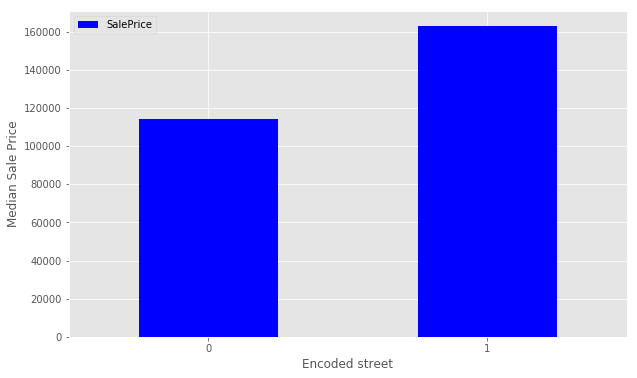

In [313]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

condition_pivot = train.pivot_table(index='enc_street', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded street')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### SaleCondition feature:

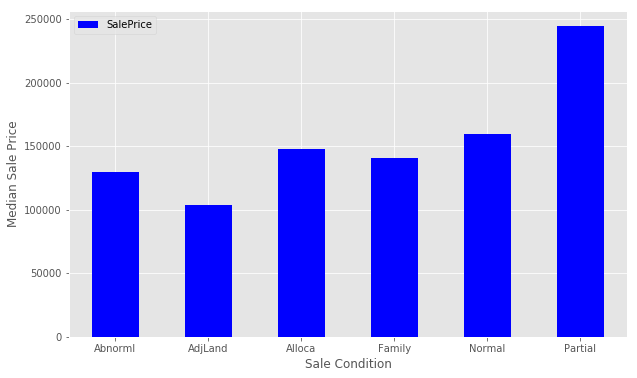

In [314]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

we do the same for sale condition, we notice that partial has the highest median ( value of sale price which is the target value ) so we create another feature called enc_condition and we assign 1 to samples who have this value and 0 to others

In [315]:
# do the same with other features

In [316]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

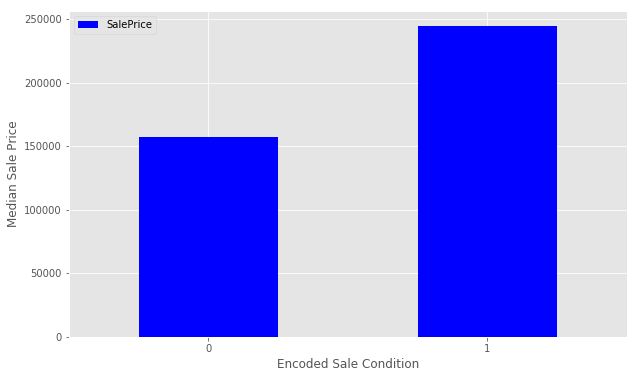

In [317]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### OverallQual feature:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [318]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


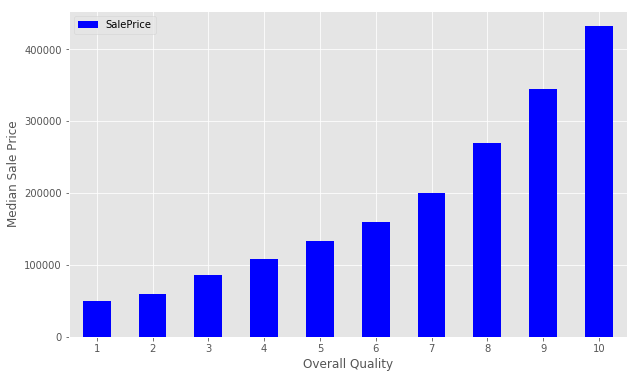

In [319]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### GrLivArea feature:

GrLivArea: Above grade (ground) living area square feet

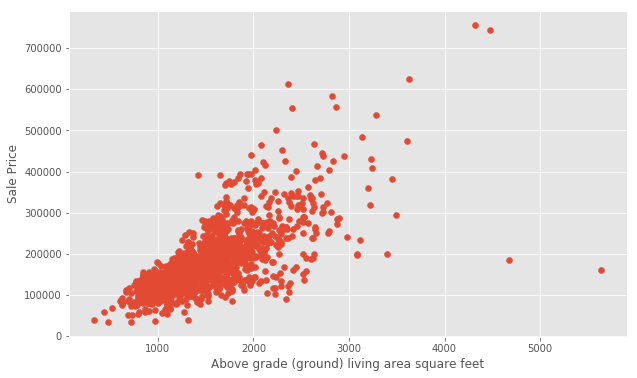

In [320]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We see that there is some outliers, we will try to remove them

In [321]:
train = train[train['GrLivArea'] < 4000]

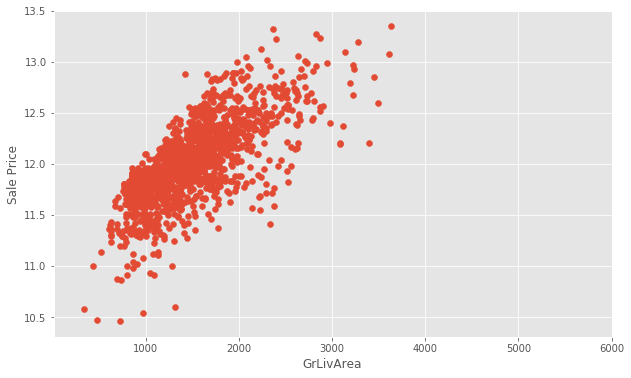

In [322]:
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.xlim(10,6000) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

#### GarageArea feature:

GarageArea: Size of garage in square feet


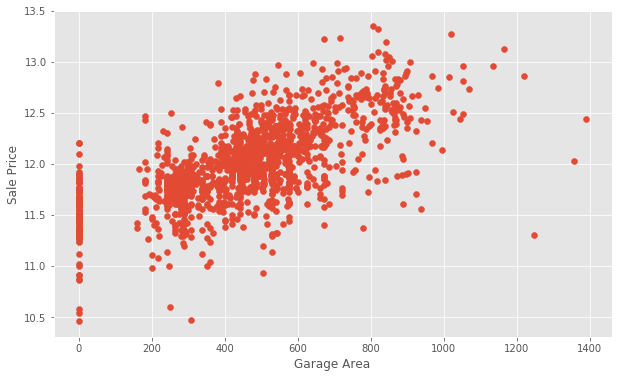

In [323]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [324]:
train = train[train['GarageArea'] < 1200]


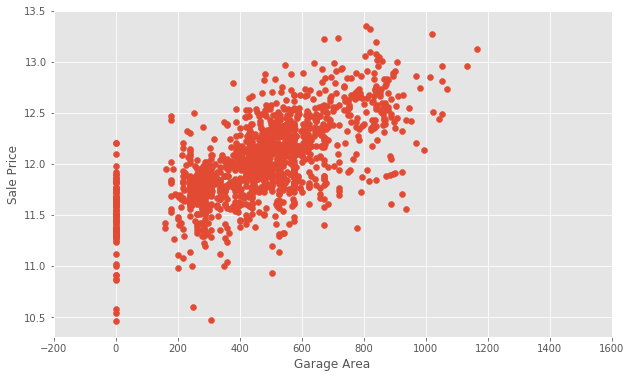

In [325]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()